In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.insert(0,'../code/')
from fixed_only import FixedOnly
import plot_fixed_only as pf

#### Read data

In [1]:
# ----- insert code to read in data as pandas DataFrame

#### Input parameters

- `integrand`: list of string, names of integrands
- `rates`: list of strings, names of rates
- `meas_noise_density`: dict of dict, mapping from measurement name to a dictionary specifying density corresponding to that measurement
- `rate_priors`: list of tuples, where each tuple has 3 components:
    - prior on the rate, e.g. $\iota(a,t)$
    - prior on the rate change in age, e.g. $\iota(a_1,t) - \iota(a_2,t)$
    - prior on the rate change in time, e.g. $\iota(a,t_1) - \iota(a,t_2)$
    
    The length of `rate_priors` should be equal to the length of `rates`.

- `path_to_db`: path to database
- `data`: a pandas dataframe, which must have the following columns:
    
    `age_start`,`age_end`,`year_start`,`year_end`, `meas_value`, `meas_std`
- `age_list`: list of numbers, can pass an `age_list` to dismod_at. If empty the program will use all ages appeared in `age_start` and `age_end` from `data`
- `time_list`: similar to `age_list`

In [6]:
integrand = ['Sincidence']
rates = ['iota']
meas_noise_density = {'Sincidence':{'density':'gaussian'}}
rates_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-4,'mean': .1},\
    {'density': 'log_gaussian', 'mean':0.0, 'std': .01, 'eta': 1e-5},\
    {'density': 'gaussian', 'mean':0.0, 'std': .01})]
covariates = [{'name':'bmi','type': 'rate_value','effected': 'iota'},
             {'name': 'ow', 'type': 'rate_value', 'effected': 'iota'}]
cov_priors = [({'density':'uniform','mean': 0.0},{'density':'gaussian','mean':0.0,'std':.1},\
             {'density':'gaussian','mean':0.0,'std':.1}),
             ({'density':'uniform','mean': 0.0},{'density':'gaussian','mean':0.0,'std':.1},\
             {'density':'gaussian','mean':0.0,'std':.1})]
#---------change path------------
path = './data/diabetes/incidence_cov.db'

### No covariate

In [7]:
model = FixedOnly(data, integrand,rates, rates_priors, meas_noise_density,path, 
                  covariates=covariates, cov_priors=cov_priors)

/home/prefix/dismod_at.release/bin/dismod_at ./data/diabetes/incidence_cov2.db init


#### Fit model

In [8]:
import time
t0 = time.time()
model.fit_fixed()
print('elapsed time: ',time.time()-t0)

/home/prefix/dismod_at.release/bin/dismod_at ./data/diabetes/incidence_cov2.db fit fixed
elapsed time:  18.941978693008423


#### Sample plots

**WARNING**: the model is run on only 1000 data entries and hence plots below may not make sense. They are only for the purpose of demonstrating what plots the plotting code can generate.

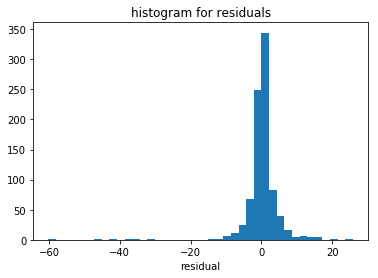

In [9]:
#----------change path--------------------
path_to_folder = './data/diabetes/'
residuals_gaussian = pf.plot_residuals(path_to_folder+'data.csv',bins=40)

- the plot does not make a lot of sense now. Please plot when having more data. You can plot rates or covariates over time/age.

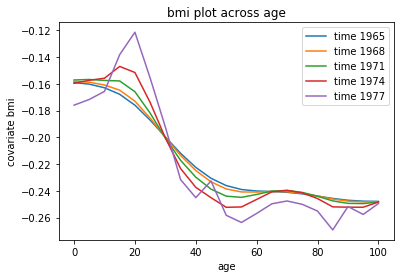

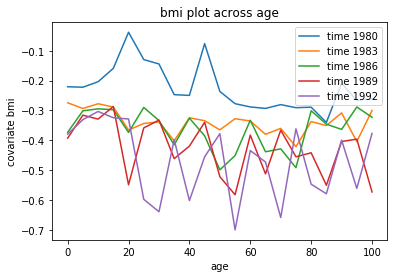

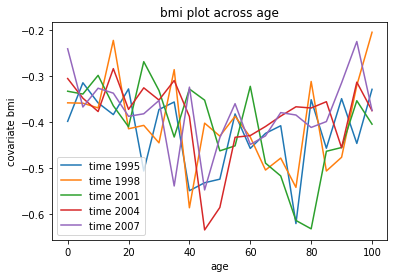

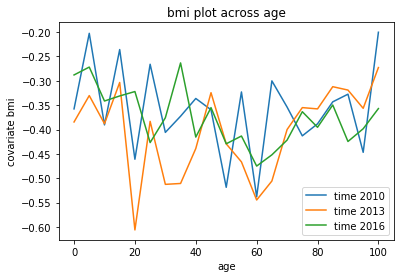

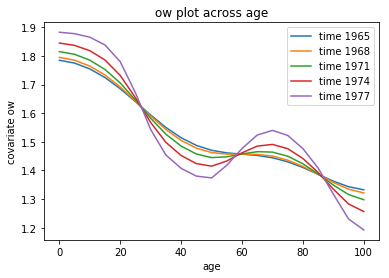

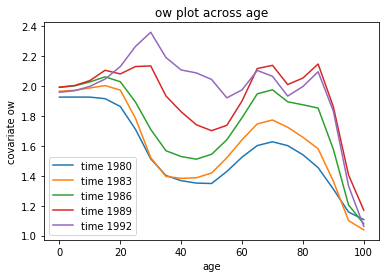

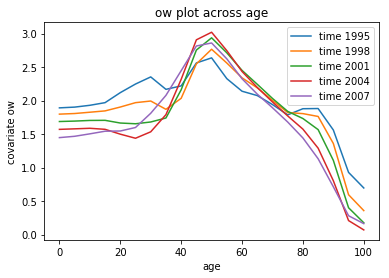

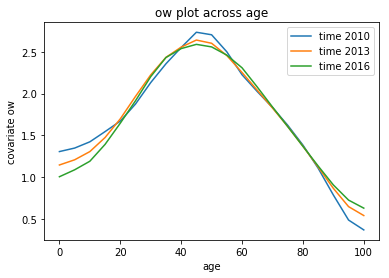

In [11]:
plt.figure()
X,Z = pf.plot_change_over_age('covariate','bmi','', path_to_folder+'variable.csv',\
                                   path_to_folder+'data.csv',time_list=model.time_list,legend=True, plot_data=False)
plt.figure()
Y,Z = pf.plot_change_over_age('covariate','ow', '', path_to_folder+'variable.csv', \
                                    path_to_folder+'data.csv',time_list=model.time_list,legend=True, plot_data=False)

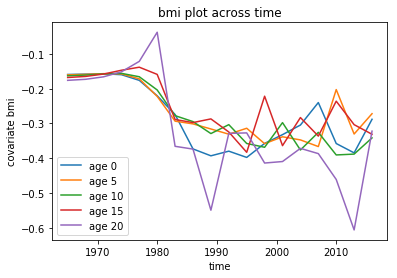

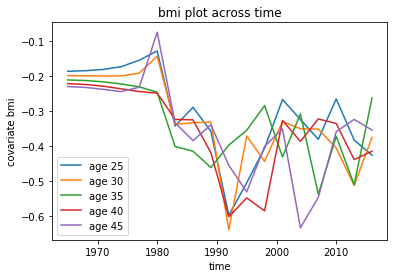

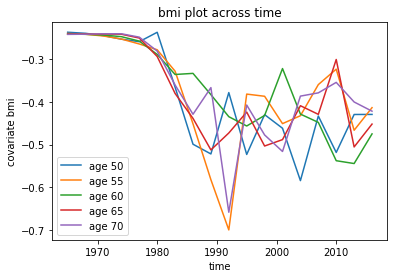

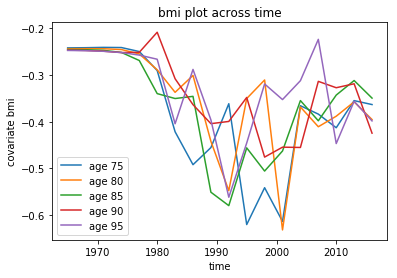

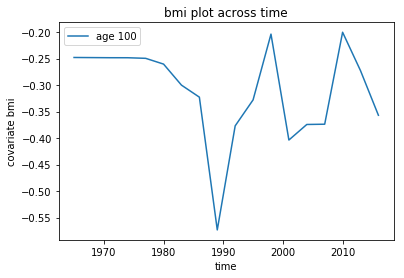

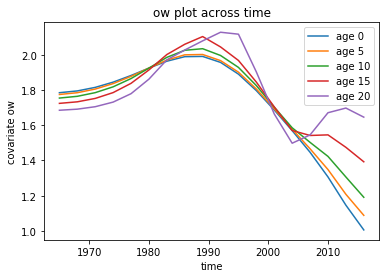

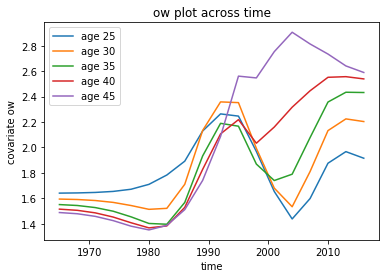

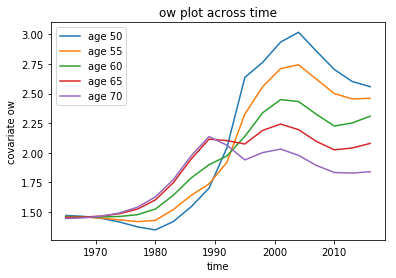

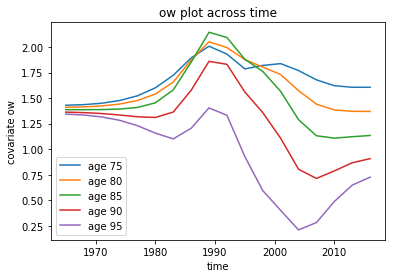

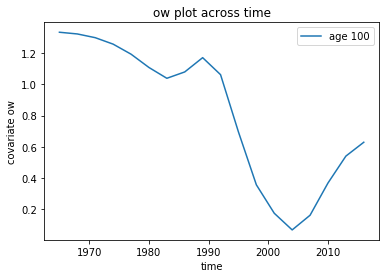

In [12]:
plt.figure()
X,Z = pf.plot_change_over_time('covariate','bmi','', path_to_folder+'variable.csv',\
                                   path_to_folder+'data.csv',age_list=model.age_list,legend=True, plot_data=False)
plt.figure()
Y,Z = pf.plot_change_over_time('covariate','ow', '', path_to_folder+'variable.csv', \
                                    path_to_folder+'data.csv',age_list=model.age_list,legend=True, plot_data=False)

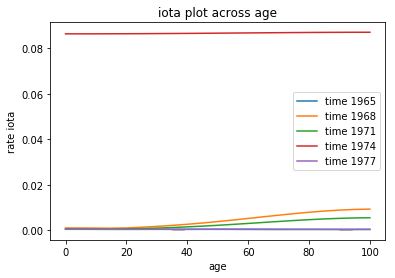

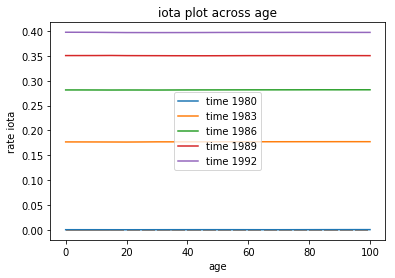

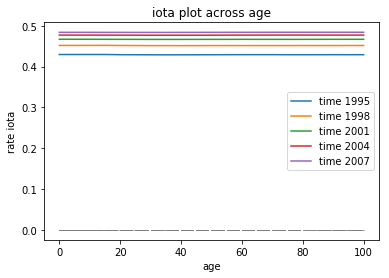

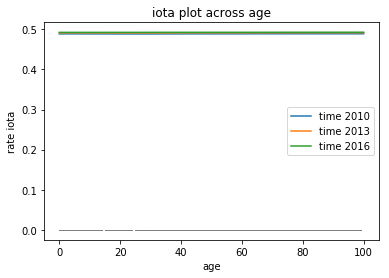

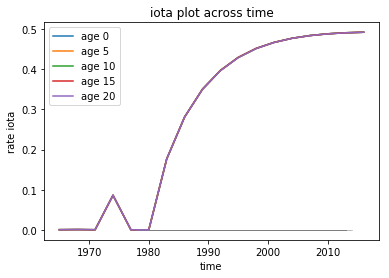

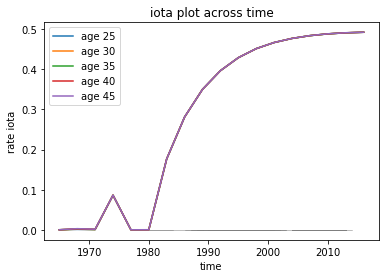

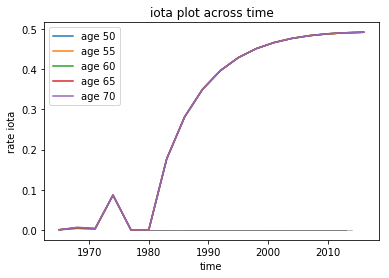

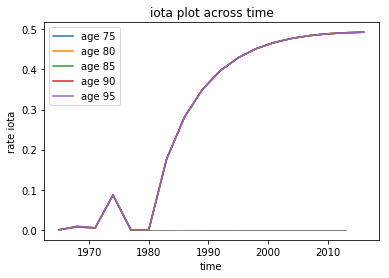

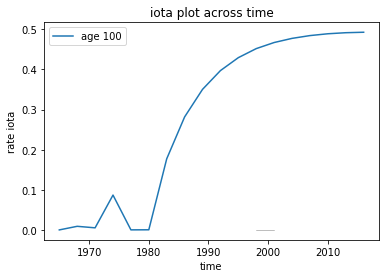

In [10]:
plt.figure()
X,Z = pf.plot_change_over_age('rate', 'iota','Sincidence', path_to_folder+'variable.csv',\
                              path_to_folder+'data.csv', time_list=model.time_list,legend=True)
plt.figure()
Y,Z = pf.plot_change_over_time('rate', 'iota', 'Sincidence', path_to_folder+'variable.csv',\
                               path_to_folder+'data.csv', age_list=model.age_list,legend=True)